In [1]:

import logging
import logging.handlers
import os
import pprint
import sys
from datetime import datetime  # noqa

from dotenv import dotenv_values

from solaredge.api import SolaredgeClient

logger = logging.getLogger()
if (logger.hasHandlers()):
    logger.handlers.clear()
logger.addHandler(logging.StreamHandler(sys.stdout))
logger.setLevel(logging.INFO)

env_path = os.path.expanduser('~/.env')
if os.path.exists(env_path):
    env = dotenv_values(env_path)
    
client = SolaredgeClient(apikey=env.get('solaredge_apikey'))

Initialising Solaredge API Client
Calling API endpoint: Site List
Found a site with id: 1756278
Calling API endpoint: Site Inventory
Found an inverter with SN: 730299E6-F4


In [2]:
client.set_dates(7,1)
client.set_datetimes(7, 1)
client.set_time_unit("HOUR")

In [3]:
energy = client.get_energy()
power = client.get_power()
powerd = client.get_power_details()

Calling API endpoint: Site Energy
Calling API endpoint: Site Power
Calling API endpoint: Site Power - Details


In [4]:
pprint.pprint(powerd)

DetailData(timeUnit='QUARTER_OF_AN_HOUR',
           unit='W',
           meters=[DataType(type='Production',
                            values=[Value(date=datetime.datetime(2023, 8, 21, 0, 0),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 8, 21, 0, 15),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 8, 21, 0, 30),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 8, 21, 0, 45),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 8, 21, 1, 0),
                                          value=0.0),
                                    Value(date=datetime.datetime(2023, 8, 21, 1, 15),
                                          value=0.0),
                                    Value(date=datet

In [5]:
for data in energy.values:
    print(data.date.hour, data.date)

0 2023-08-21 00:00:00
1 2023-08-21 01:00:00
2 2023-08-21 02:00:00
3 2023-08-21 03:00:00
4 2023-08-21 04:00:00
5 2023-08-21 05:00:00
6 2023-08-21 06:00:00
7 2023-08-21 07:00:00
8 2023-08-21 08:00:00
9 2023-08-21 09:00:00
10 2023-08-21 10:00:00
11 2023-08-21 11:00:00
12 2023-08-21 12:00:00
13 2023-08-21 13:00:00
14 2023-08-21 14:00:00
15 2023-08-21 15:00:00
16 2023-08-21 16:00:00
17 2023-08-21 17:00:00
18 2023-08-21 18:00:00
19 2023-08-21 19:00:00
20 2023-08-21 20:00:00
21 2023-08-21 21:00:00
22 2023-08-21 22:00:00
23 2023-08-21 23:00:00
0 2023-08-22 00:00:00
1 2023-08-22 01:00:00
2 2023-08-22 02:00:00
3 2023-08-22 03:00:00
4 2023-08-22 04:00:00
5 2023-08-22 05:00:00
6 2023-08-22 06:00:00
7 2023-08-22 07:00:00
8 2023-08-22 08:00:00
9 2023-08-22 09:00:00
10 2023-08-22 10:00:00
11 2023-08-22 11:00:00
12 2023-08-22 12:00:00
13 2023-08-22 13:00:00
14 2023-08-22 14:00:00
15 2023-08-22 15:00:00
16 2023-08-22 16:00:00
17 2023-08-22 17:00:00
18 2023-08-22 18:00:00
19 2023-08-22 19:00:00
20 2023-

In [6]:
telemetry = client.get_inverter_telemetry()
pprint.pprint(telemetry)

Calling API endpoint: Inverter Technical Data
[Telemetry(date=datetime.datetime(2023, 8, 21, 5, 51, 50),
           totalActivePower=0.0,
           powerLimit=100.0,
           totalEnergy=11132500.0,
           temperature=25.7784,
           inverterMode='MPPT',
           operationMode=0,
           groundFaultResistance=0,
           vL1To2=0,
           vL2To3=0,
           vL3To1=0,
           dcVoltage=19.8891,
           L1Data=LData(acCurrent=0.0,
                        acVoltage=252.756,
                        acFrequency=49.9852,
                        apparentPower=0.0,
                        activePower=0.0,
                        reactivePower=0.0,
                        cosPhi=0.0),
           L2Data=None,
           L3Data=None),
 Telemetry(date=datetime.datetime(2023, 8, 21, 5, 56, 50),
           totalActivePower=0.0,
           powerLimit=100.0,
           totalEnergy=11132500.0,
           temperature=26.4166,
           inverterMode='MPPT',
           operat

In [7]:
import pandas as pd
from dataclasses import asdict, dataclass


for index , obj in enumerate(power.values):
    power.values[index] = asdict(obj)

dfpower = pd.json_normalize(power.values)


NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='date', ylabel='value'>

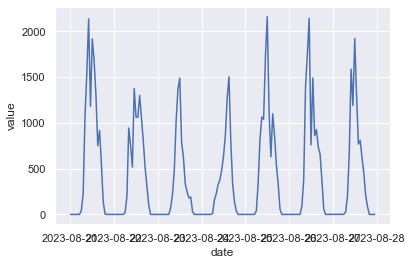

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
for index , obj in enumerate(energy.values):
    energy.values[index] = asdict(obj)
dfenergy = pd.json_normalize(energy.values)
dfp = pd.DataFrame(dfpower)
dfe = pd.DataFrame(dfenergy)

sns.set_theme()

sns.lineplot(x="date", y="value", data=dfe)
#sns.lineplot(x="date", y="value", data=dfp)

print([item.SN for list in [data.inverters for data in client._storeddata.inventories] for item in list])

In [10]:
pprint.pprint(client._storeddata)



SummaryData(sites=[Site(id=1756278,
                        name='27 Stafford Road - Clayton',
                        accountId=5665,
                        status='Active',
                        peakPower=4.68,
                        lastUpdateTime=datetime.datetime(2023, 8, 28, 0, 0),
                        currency='GBP',
                        installationDate=datetime.datetime(2020, 8, 12, 0, 0),
                        ptoDate=None,
                        notes='',
                        type='Optimizers & Inverters',
                        location=Location(country='United Kingdom',
                                          city='Warrington ',
                                          address='Stafford Road 27',
                                          address2='',
                                          zip='WA4 6RP',
                                          timeZone='Europe/London',
                                          countryCode='GB'),
                    